## Av. Temperature Prediction using Random forest

 for Forecasting of Av. Temperature ,we will use :
>   * Linear Regression

In [1]:
# importing Required libraries
import numpy as np         
import pandas as pd         
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to prevent warnings from showing up frequently
import warnings
warnings.filterwarnings('ignore')

#  Loading the Weather dataset

In [3]:
df=pd.read_csv('Weather_Data.csv')

In [4]:
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


#  Description of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   object 
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   object 
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   object 
 12  WindDir3pm     3271 non-null   object 
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

In [6]:
df.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


# Data visualization

#  *feature analysis*

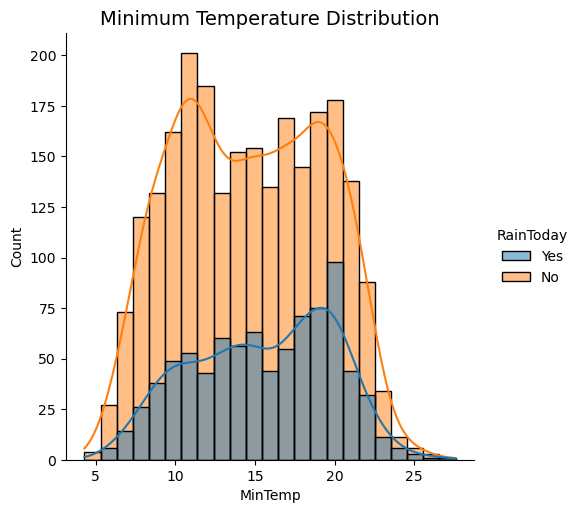

In [7]:
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

> range of minimum temperature is from ;4.3 to 27.6 (*In degree celcius*).
> 11  and 20 (*in celcius*) minimum temperature has the highest frequency in the dataset.

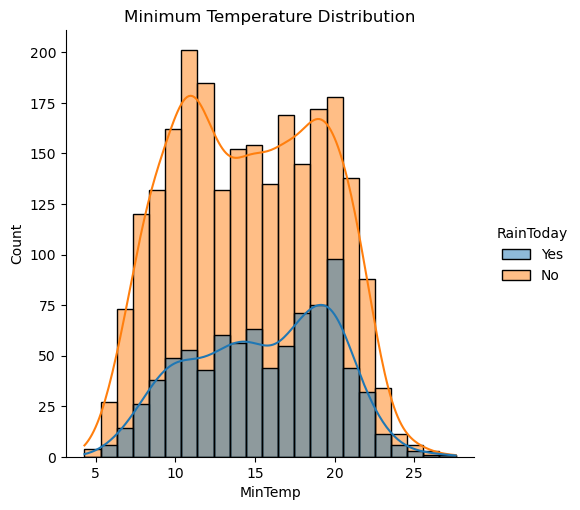

In [8]:
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution")
plt.show()

On the other hand, the range of maximum temperature is from 11.7 to 45.8 and 25 maximum temperature has the highest frequency in the dataset.
Note : here also all values are in *degree celcius*

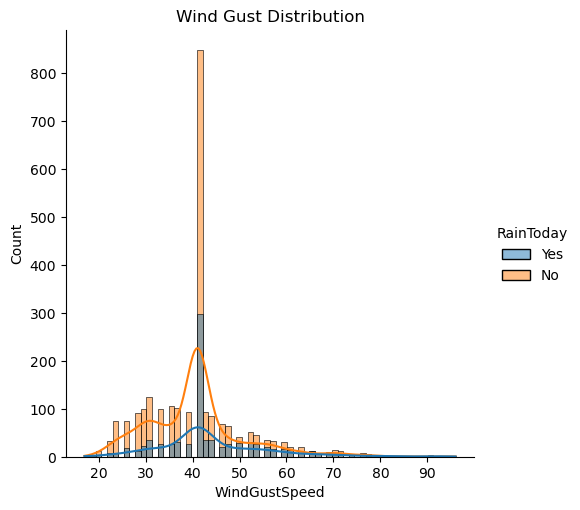

In [9]:
sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution")
plt.show()

During the analysis, it has also been found that the range of strong wind gusts is from 17 compass points to 97 compass points and 43 compass points of wind gusts have the highest frequency in the dataset.

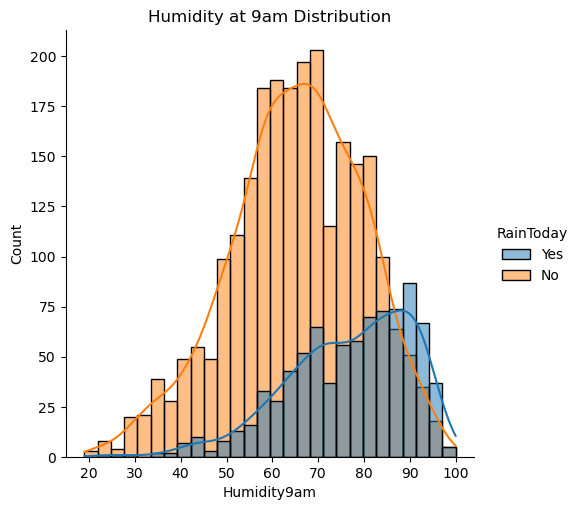

In [10]:
sns.displot(df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution")
plt.show()

here it has been found that the range of humidity at 9 am and 3 pm is from *19% to 100%* approximately and** 70*%* of humidity at 9 am has the highest frequency in the dataset.

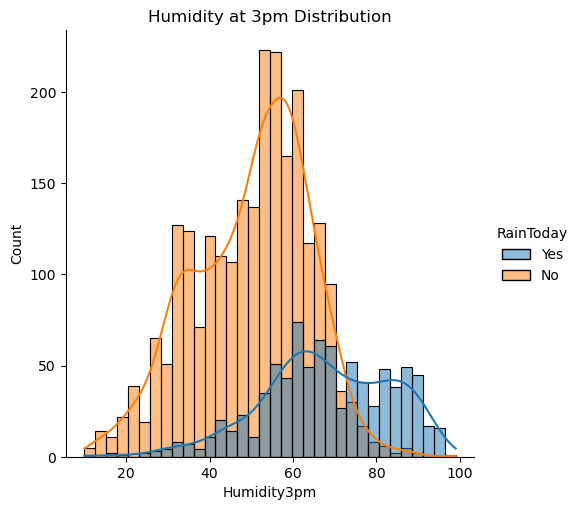

In [11]:
sns.displot(df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution")
plt.show()

On the other hand, 47.58% of humidity at 3 pm has the highest frequency in the dataset.

In similiar way we can plot for windspeed at 3am and 9 am.
the corresponding findings are :
**range of wind speed at 9 am** =  *0 kmph to 57 kmph*,** Max.freq**.=*12kmph*
**range of wind speed at 3 am** =  *0 kmph to 57 kmph*, **Max.freq**.=*19kmph*

#   E.D.A

#  *average month-wise pressure analysis*

In [12]:
#Here also we use groupyby method along with some index slicing to categorise our req. data w.r.t 'month'
pressure_weather_df = df.groupby(df['Date'].str[3:5])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.tail()

,Date,Pressure9am,Pressure3pm
7,08,1015.941577,1013.565789
8,09,1016.675556,1014.475100
9,10,1018.082079,1016.032258
10,11,1017.323704,1015.165185
11,12,1017.806093,1015.483871


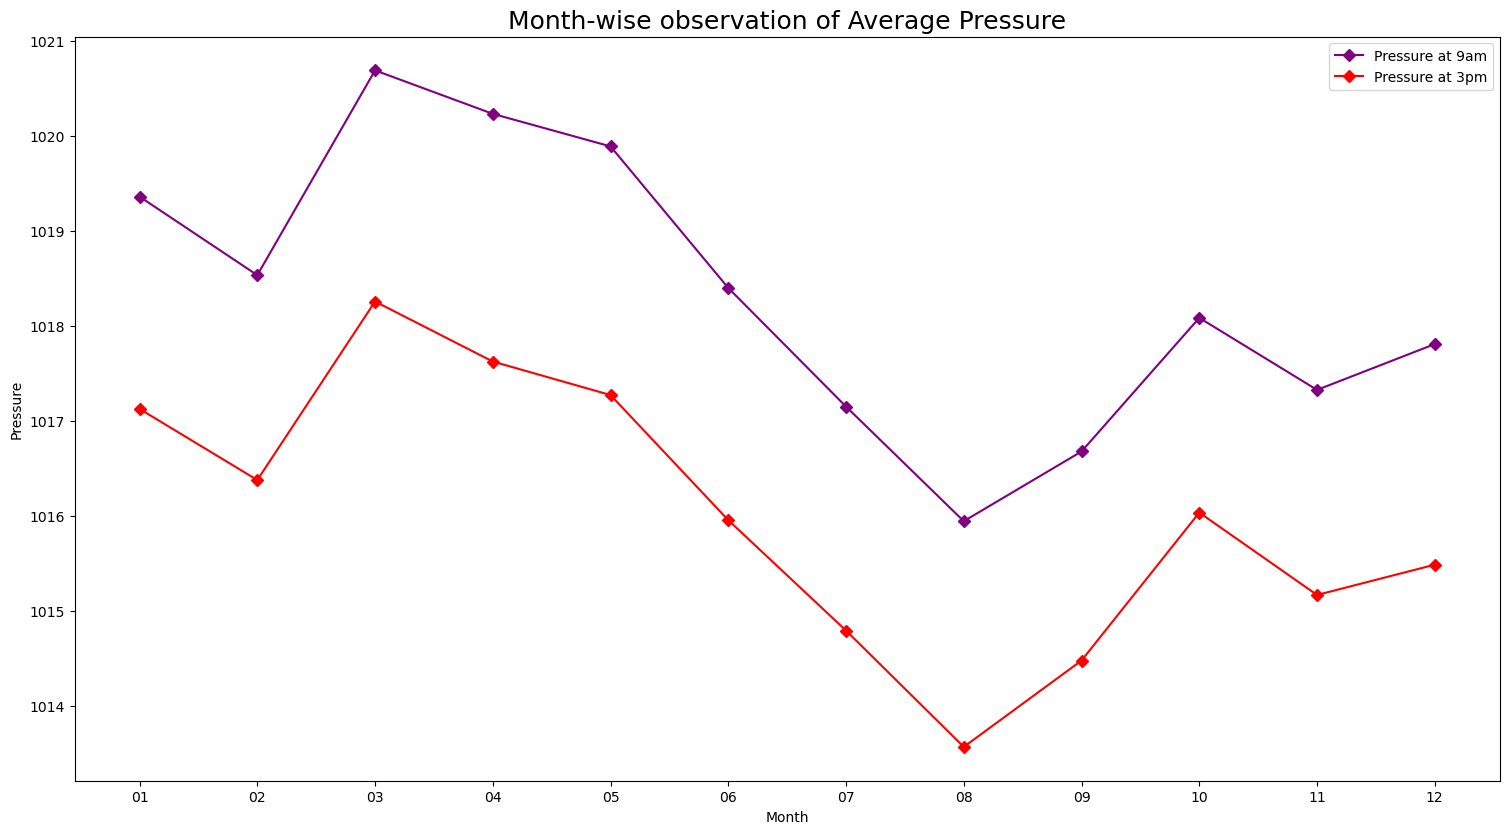

In [13]:
# Now we will use matplotlib for plotting the graph.
x = pressure_weather_df['Date']
y1 = pressure_weather_df['Pressure9am'] 
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1,marker='D' ,color = 'purple', label = 'Pressure at 9am') 

plt.plot(x, y2,marker='D' ,color = 'red', label = 'Pressure at 3pm')
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Pressure')

plt.title('Month-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')

plt.show()

During this analysis, it has been found that the pressure between the **month of March and April** at 9 am has the highest pressure as **1022.93 hPa**. On the other hand, at 3 pm, between the **month March and April** has the highest pressure as **1018.79 hPa**. Finally, it can be concluded that pressure at 9 am is much higher than the pressure at 3 pm.

#  *average month-wise temperature analysis*

In [14]:
df['Av_Temp'] = df[['Temp9am', 'Temp3pm','MinTemp','MaxTemp']].mean(axis=1)
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Av_Temp
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,SSW,17,20,92,84,1017.6,1017.4,8,8,20.875
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,E,9,13,83,73,1017.9,1016.4,7,7,23.075
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,17,2,88,86,1016.7,1015.6,7,8,23.150
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,E,22,20,83,90,1014.2,1011.8,8,8,21.325
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,W,11,6,88,74,1008.3,1004.8,8,8,23.350


In [15]:
# we apply this methodology to grab av.temp. values based on month
location_weather_df = df.groupby(df['Date'].str[3:5])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm','Av_Temp']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df

,Date,MinTemp,MaxTemp,Temp9am,Temp3pm,Av_Temp
0,01,14.851331,22.621673,17.158555,21.422814,19.013593
1,02,14.154331,21.984252,16.439764,20.783858,18.340551
2,03,12.713620,21.339068,15.451971,20.127599,17.408065
3,04,12.600000,21.145926,15.721111,19.736667,17.300926
4,05,12.651971,21.878495,15.939785,20.335125,17.701344
5,06,13.621852,22.000741,16.786296,20.429259,18.209537
6,07,14.223297,22.521505,17.465591,20.882437,18.773208
7,08,15.870251,24.025090,19.237276,22.390323,20.380735
8,09,17.608148,25.315926,21.029630,23.648889,21.900648
9,10,17.709319,24.853047,20.483154,23.400000,21.611380


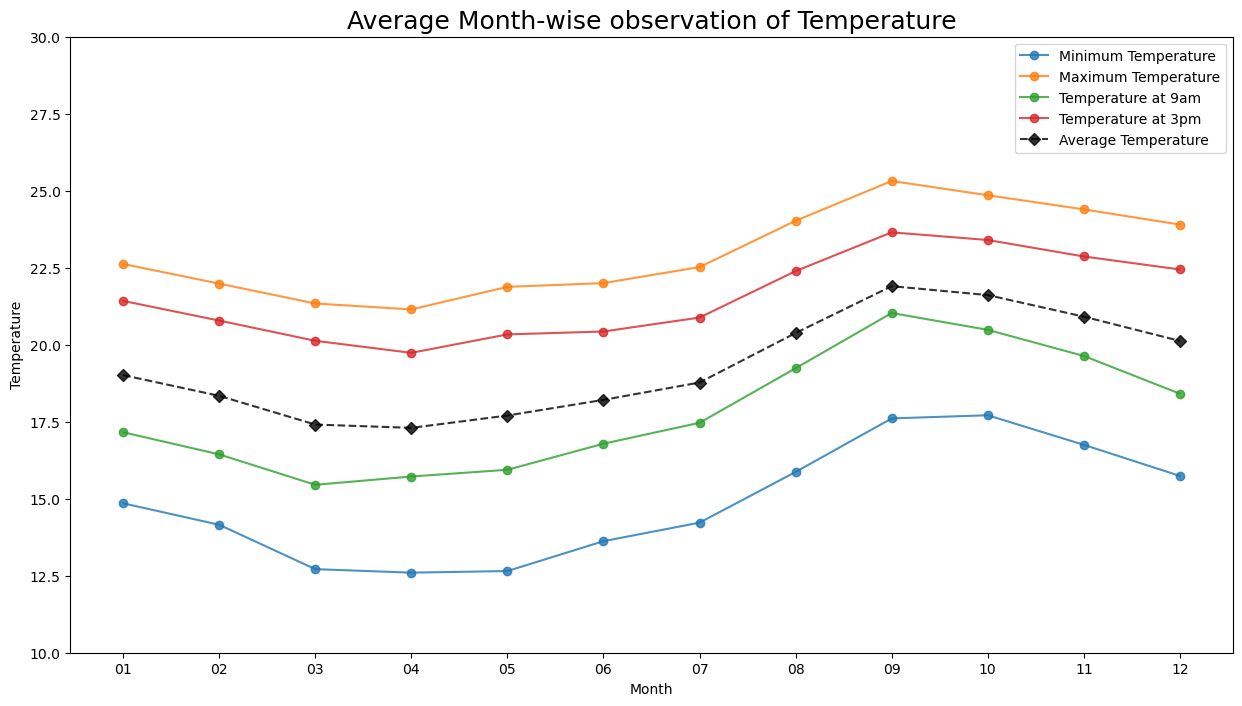

In [16]:
x = location_weather_df['Date']
y1 = location_weather_df['MinTemp'] 
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am'] 
y4 = location_weather_df['Temp3pm']
y5 = location_weather_df['Av_Temp']

plt.figure(figsize = (15, 8))

plt.plot(x, y1,marker = 'o' ,label = 'Minimum Temperature', alpha = 0.8) 
plt.plot(x, y2, marker='o',label = 'Maximum Temperature', alpha = 0.8) 
plt.plot(x, y3, marker='o',label = 'Temperature at 9am', alpha = 0.8) 
plt.plot(x, y4, marker='o', label = 'Temperature at 3pm', alpha = 0.8)
plt.plot(x, y5, linestyle='--'  ,color = 'black' ,marker='D', label = 'Average Temperature', alpha = 0.8)

plt.ylim(10,30)

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Average Month-wise observation of Temperature', fontsize = 18)
plt.legend( loc = 'best')

plt.show()

as we see above all these instances of temerature , all of them basically follows similiar pattern with mostly **Sept-Oct** as the months having highest temperatures.

Now we will find correlation values.
However we first need to remove some colums from the dataset.

In [17]:
new_df=df.drop(columns=['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm','Av_Temp'])

In [18]:
# we can use .corr() method to find the correlation matrix.
new_df.corr()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
Temp9am,1.000000,0.828457,0.939307,0.858639,-0.054297,0.606122,0.113891,0.159570,-0.334084,0.280009,-0.145944,0.131855,-0.417437,-0.401353,0.093204,0.068683
Temp3pm,0.828457,1.000000,0.753147,0.960805,-0.142748,0.474599,0.345528,0.036216,-0.351836,0.136713,-0.155192,-0.212696,-0.342862,-0.387945,-0.086544,-0.144965
MinTemp,0.939307,0.753147,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028
MaxTemp,0.858639,0.960805,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217
Rainfall,-0.054297,-0.142748,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999
Evaporation,0.606122,0.474599,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422
Sunshine,0.113891,0.345528,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861
WindGustSpeed,0.159570,0.036216,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016
WindSpeed9am,-0.334084,-0.351836,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030
WindSpeed3pm,0.280009,0.136713,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435


<Axes: >

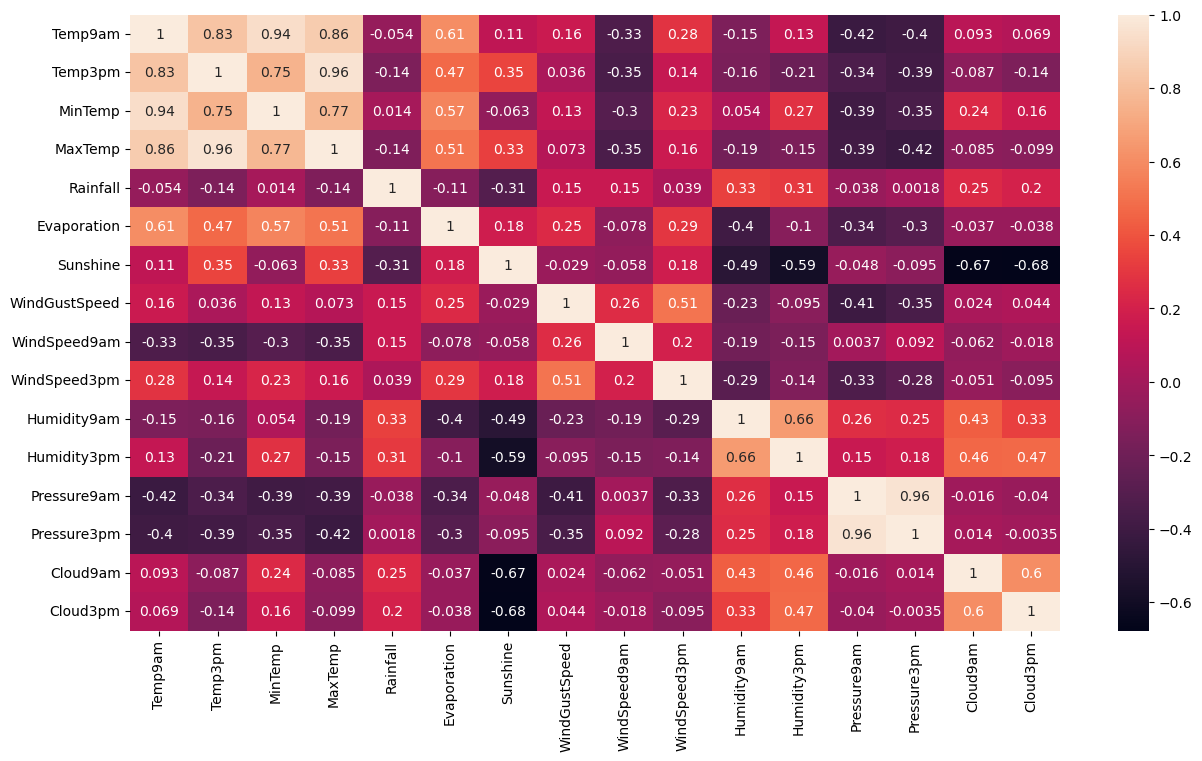

In [19]:
#corr matrix visualization
plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr(),annot=True)

Above plot clearly inform us that some of values are highly correlated having values like Temp9am and Temp3am=0.83,Temp3am and Min temp =0.7.

# Data preprocessing

#  *Standardize the Variables*

The scale of the variables matters ,Because the classifier and regressor predicts the class/values of a given test observation by identifying the observations that are nearest to it. Any variables that are on a large scale will have a much larger effect on the distance between the observation.
So we need to First standardize the data.


In [20]:
# Importing the Std. scaler from scikit learn.
from sklearn.preprocessing import StandardScaler

In [21]:
# Instantiating the std. scaler function
scaler = StandardScaler()


In [22]:
# To compute the mean and std to be used for later scaling.
scaler.fit(new_df)

scaled_features = scaler.transform(new_df)

scaled_features.shape

(3271, 16)

In [23]:
# we will create a new dataframe containing scaled version of origina data.
new_df1= pd.DataFrame(scaled_features,columns=new_df.columns[:17])

# we also need to add dropped off columns during scaling.

add_columns = df[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm','Av_Temp']]

# now we need to concat both columns together

std_df = pd.concat([new_df1,add_columns],axis=1)

std_df.head()



,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Date,RainToday,WindGustDir,WindDir9am,WindDir3pm,Av_Temp
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,-0.104633,0.199024,1.457110,1.586088,01-02-13,Yes,W,S,SSW,20.875
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,-0.061892,0.056550,1.061312,1.171306,02-02-13,Yes,W,W,E,23.075
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,-0.232857,-0.057429,1.061312,1.586088,03-02-13,Yes,W,ESE,ESE,23.150
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,-0.589032,-0.598829,1.457110,1.586088,04-02-13,Yes,W,NNE,E,21.325
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,-1.429605,-1.596144,1.457110,1.586088,05-02-13,Yes,W,NNE,W,23.350


#  *Transforming categorial variables*

we will use pandas *get dummies* to convert categorial feature to binary variables.


In [24]:
df_final = pd.get_dummies(data=std_df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'])
df_final.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,False,False,False,True,False,False,False,False,False,True
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,False,False,False,False,False,False,False,False,False,True
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,False,False,False,False,False,False,False,False,False,True
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,False,False,False,False,False,False,False,False,False,True
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,False,False,False,False,False,True,False,False,False,True


In [25]:
df_final.drop('Date',axis=1,inplace=True)

In [26]:
df_final = df_final.astype(float)

In [27]:
# putting our feature variable as "X" and Target variable as "y".
# Note : we will drop temp variable volumns now.
X = df_final.drop(['Av_Temp','Temp9am', 'Temp3pm','MinTemp','MaxTemp'],axis=1)
y = df_final['Av_Temp']


**Splitting the data for training and testing**

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.35)

# **Decision Tree:**

In [29]:
#importing linear regression from sklearn
from sklearn.tree import DecisionTreeRegressor
Dr=DecisionTreeRegressor()
Dr.fit(X_train,y_train)



DecisionTreeRegressor()

In [30]:
prediction = Dr.predict(X_test)


# Model evaluation (Decision tree)

In [31]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction)) 
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.976331877729258
MSE: 14.727296943231442
RMSE: 3.8376160494806464


So our model predict RMSE=3.91 unit. Looks like it performed worse than Linear reg. and SVM.

Let's quickly explore the residuals to make sure everything was okay with our data.So we are plotting a histogram of the residuals and make sure it looks normally distributed.

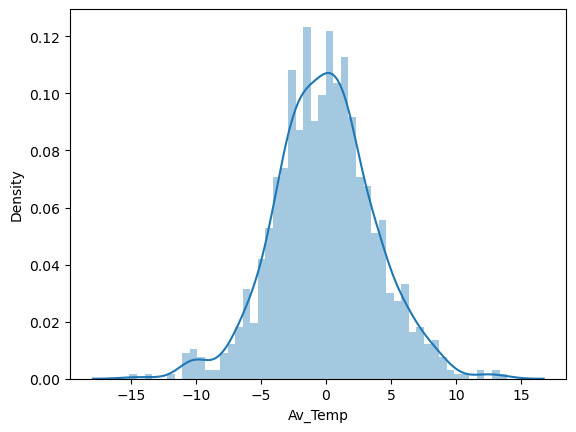

In [32]:
sns.distplot((y_test-prediction),bins=50);

# Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
# we will take n_est. value as 45 based on some findings later
rfr = RandomForestRegressor(n_estimators=45)
rfr.fit(X_train,y_train)
pred_= rfr.predict(X_test)

In [82]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_)) 
print('MSE:', metrics.mean_squared_error(y_test, pred_))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_)))

MAE: 2.0591183891314895
MSE: 6.818886448056499
RMSE: 2.6112997621982235


In [79]:
# We will create an empty list to store error values.
error_rate = []

#  we iterate through values of n_neighbour here.
for i in range(40,60):                                
    
    RFR = RandomForestRegressor(n_estimators=i)      
    RFR.fit(X_train,y_train)
    pred_i = RFR.predict(X_test.values)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

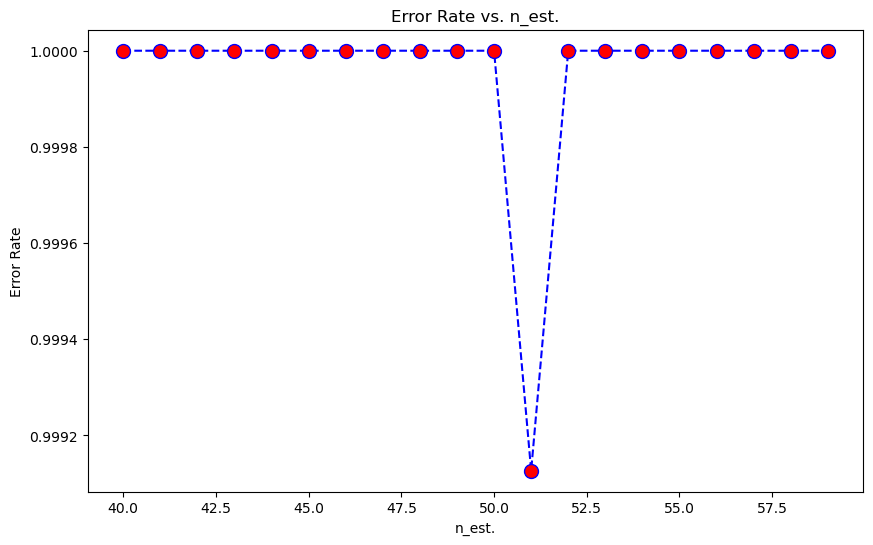

In [80]:
# Plotting the error rates w.r.t to n_est. values.

plt.figure(figsize=(10,6))
plt.plot(range(40,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_est.')
plt.xlabel('n_est.')
plt.ylabel('Error Rate')